In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)Tokenpost1.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)Tokenpost2.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)Tokenpost3.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)Tokenpost4.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)Tokenpost5.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../../news/scraping_result/kr/2019_up1/2019_up1_(KR)BlockMedia.csv', error_bad_lines=False))



In [2]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [4]:
text['main article']

0      \n\n\n\n\n사진=PIXABAY\n\n                      ...
1      \n\n\n\n\n사진=PIXABAY\n\n                      ...
2      \n\t\t\t\t\t\t\t\t‘가상화폐 대장주’ 비트코인 가격이 1년 만에 10...
3      \n\n\n\n\n사진=PIXABAY\n\n                      ...
4      \n\n\n\n\n사진=PIXABAY\n\n                      ...
                             ...                        
236    이번에 선정된 공공부문 시범사업 12개는 다음과 같다.▲블록체인을 적용한 신뢰기반 ...
237    삼성그룹 이병철 회장은 깊은 생각에 잠겨 있었다.“할 것이냐 말 것이냐” 그의 결정...
238    디지털혁신캠퍼스는 농협은행이 2015년 설립한 ‘NH핀테크 혁신센터’의 규모를 확대...
239    사진=한국전파진흥협회 제공한국전파진흥협회는 ‘클라우드 서비스 개발 전문가 양성과정’...
240    aSSIST 경영대학원은 디지털 기술 혁명을 실제 적용하는데 어려움을 겪고 있는 기...
Name: main article, Length: 847, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [6]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [7]:
text['pos tag']

0      [(사진, NNG), (=, SY), (PIXABAY, SL), (대표, NNG),...
1      [(사진, NNG), (=, SY), (PIXABAY, SL), (비트코인, NNP...
2      [(‘, SY), (가상, NNG), (화폐, NNG), (대, XPN), (장주,...
3      [(사진, NNG), (=, SY), (PIXABAY, SL), (대표, NNG),...
4      [(사진, NNG), (=, SY), (PIXABAY, SL), (비트코인, NNP...
                             ...                        
236    [(이번, NNG), (에, JKB), (선정, NNG), (된, XSV+ETM),...
237    [(삼성그룹, NNP), (이병철, NNP), (회장, NNG), (은, JX), ...
238    [(디지털, NNG), (혁신, NNG), (캠퍼스, NNG), (는, JX), (...
239    [(사진, NNG), (=, SY), (한국, NNP), (전파, NNG), (진흥...
240    [(aSSIST, SL), (경영, NNG), (대학원, NNG), (은, JX),...
Name: pos tag, Length: 847, dtype: object

In [8]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC','VCP+ETM')])

In [9]:
text['main article']

0      [사진, =, PIXABAY, 대표, 상, 화폐, (, 암호, 화폐, ), 비트코인...
1      [사진, =, PIXABAY, 비트코인, 또, 다시, 연중, 최고점, 돌파, 하, ...
2      [‘, 가상, 화폐, 대, 장주, ’, 비트코인, 가격, 년, 만, 만, 원, 다시...
3      [사진, =, PIXABAY, 대표, 상, 화폐, (, 암호, 화폐, ), 비트코인...
4      [사진, =, PIXABAY, 비트코인, 받, 는, 기업, 들, 늘, 있, 다, ....
                             ...                        
236    [이번, 선정, 된, 공공, 부문, 시범, 사업, 개, 다음, 같, 다, ., ▲,...
237    [삼성그룹, 이병철, 회장, 깊, 은, 생각, 잠겨, 있, 다, ., “, 할, 것...
238    [디지털, 혁신, 캠퍼스, 농협, 은행, 년, 설립, 한, ‘, NH, 핀테크, 혁...
239    [사진, =, 한국, 전파, 진흥, 협회, 제공, 한국, 전파, 진흥, 협회, ‘,...
240    [aSSIST, 경영, 대학원, 디지털, 기술, 혁명, 실제, 적용, 하, 는, 데...
Name: main article, Length: 847, dtype: object

In [10]:
import csv
stopword_list =[]
f = open('../../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [11]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0      [사진, PIXABAY, 대표, 화폐, 암호, 화폐, 비트코인, 다시, 연중, 최고...
1      [사진, PIXABAY, 비트코인, 다시, 연중, 최고점, 돌파, 올라섰, 최근, ...
2      [가상, 화폐, 장주, 비트코인, 가격, 다시, 넘어섰, 분기, 해외, 유명, 기업...
3      [사진, PIXABAY, 대표, 화폐, 암호, 화폐, 비트코인, 오전, 급락, 사흘...
4      [사진, PIXABAY, 비트코인, 기업, 이름, 기업, 앞장섰, 수수료, 저렴, ...
                             ...                        
236    [이번, 선정, 공공, 부문, 시범, 사업, 다음, 블록체인, 적용, 신뢰, 기반,...
237    [삼성그룹, 이병철, 회장, 생각, 잠겨, 결정, 따라, 삼성, 바뀌, 꼬박, 새운...
238    [디지털, 혁신, 캠퍼스, 농협, 은행, 설립, NH, 핀테크, 혁신, 센터, 규모...
239    [사진, 한국, 전파, 진흥, 협회, 제공, 한국, 전파, 진흥, 협회, 클라우드,...
240    [aSSIST, 경영, 대학원, 디지털, 기술, 혁명, 실제, 적용, 어려움, 기업...
Name: main article, Length: 847, dtype: object


In [12]:
article_contents = tokenized_doc.values.tolist()

In [13]:
len(tokenized_doc)

847

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [15]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [16]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [17]:
# article_contents_tfidf

In [18]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [19]:
word2id = defaultdict(lambda: 0)

In [20]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [21]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [22]:
len(tf_idf_result)

10215

In [23]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

10215


In [24]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [25]:
sentences = article_contents

In [26]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

100714

In [27]:
from gensim.models import Word2Vec

In [28]:
model = Word2Vec(sentences, min_count=1)

In [29]:
len(model.wv.vocab)

10215

In [30]:
# model.wv.vocab

In [31]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [32]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [33]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [34]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [35]:
temp_cluster_result['cluster'] = assigned_clusters

In [36]:
temp_cluster_result['raw_data'] = X.tolist()

In [37]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [38]:
from sklearn.metrics import pairwise_distances

In [39]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [40]:
len(cosine_centroid_list)

10215

In [41]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [42]:
sum(temp_distance[3])

607.0713979542504

In [43]:
import scipy.spatial.distance as dist

In [44]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0003844288364113213

In [45]:
dist.euclidean(X[0],cosine_centroid_list[0])

2.840583359695024

In [46]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [47]:
len(tf_idf_value)

10215

In [48]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [49]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소 , 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
85,"[-0.6877937316894531, 0.4706915318965912, -0.7...",코인,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.027433,0.164973,0.862459,NaN
20,"[-0.551529049873352, 0.32809633016586304, -0.6...",따르,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.009428,0.078489,0.930939,NaN
383,"[-0.6958741545677185, 0.22416965663433075, -0....",시간,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.010325,0.077016,0.933309,NaN
125,"[-0.3965640366077423, 0.4060383439064026, -0.8...",보도,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.008109,0.067126,0.940984,NaN
603,"[-0.41493022441864014, 0.15867212414741516, -0...",현지,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.010757,0.049029,0.961728,NaN
126,"[-0.2876547574996948, 0.49277636408805847, -0....",자료,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.009586,0.041664,0.967922,NaN
123,"[-0.2623101770877838, 0.5072570443153381, -0.4...",기사,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.008072,0.032405,0.975666,NaN
124,"[-0.20783038437366486, 0.4322354793548584, -0....",제보,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.013408,0.027355,0.986053,NaN
2495,"[-0.13067245483398438, 0.3006810247898102, -0....",co,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.013146,0.022095,0.991052,NaN
604,"[-0.1949579119682312, 0.06612396240234375, -0....",데스크,0,"[-0.057800096, 0.05200164, -0.08840685, -0.135...",0.007369,0.014940,0.992428,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.7314131259918213, 0.567471981048584, -0.49...",화폐,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.045458,0.398756,0.646702,NaN
4,"[-0.7680253386497498, 0.45081955194473267, -0....",암호,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.068097,0.354356,0.713741,NaN
5,"[-0.6906716823577881, 0.6404334902763367, -0.4...",비트코인,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.005190,0.254194,0.750996,NaN
18,"[-0.6201390027999878, 0.6416108012199402, -0.4...",거래소,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.010131,0.148139,0.861991,NaN
82,"[-0.6374952793121338, 0.6529945135116577, -0.3...",거래,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.006727,0.139722,0.867005,NaN
212,"[-0.7026041150093079, 0.4131704270839691, -0.3...",달러,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.025680,0.134462,0.891219,NaN
1172,"[-0.5736872553825378, 0.8379552364349365, -0.4...",토큰,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.001834,0.080382,0.921452,NaN
78,"[-0.6633819937705994, 0.5453469157218933, -0.4...",가격,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.009312,0.080803,0.928509,NaN
22,"[-0.5697240829467773, 0.5883234739303589, -0.3...",현재,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.001599,0.062075,0.939524,NaN
19,"[-0.5767572522163391, 0.747157871723175, -0.46...",비트,1,"[-0.034937266, 0.044029273, -0.02632728, -0.05...",0.000706,0.060392,0.940314,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 사회이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
244,"[-0.5690996646881104, 1.1438292264938354, -0.4...",블록체인,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.018737,0.333734,0.685002,NaN
270,"[-0.5276700854301453, 1.055306315422058, -0.39...",기술,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.013793,0.144773,0.869020,NaN
181,"[-0.5526813268661499, 0.947127103805542, -0.40...",기업,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.006709,0.122047,0.884663,NaN
180,"[-0.5688800811767578, 0.8820508122444153, -0.4...",서비스,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.011474,0.122257,0.889217,NaN
1011,"[-0.5905125737190247, 0.9930996894836426, -0.4...",통해,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.001270,0.108579,0.892690,NaN
102,"[-0.6372277140617371, 0.8135809898376465, -0.4...",시장,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.005513,0.110894,0.894619,NaN
238,"[-0.5670650005340576, 1.0024406909942627, -0.4...",한다,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.000829,0.102688,0.898141,NaN
661,"[-0.5182824730873108, 0.9029706120491028, -0.4...",밝혔,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.000214,0.086906,0.913308,NaN
156,"[-0.5694026947021484, 0.9403367638587952, -0.3...",금융,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.007859,0.094481,0.913378,NaN
236,"[-0.6154865622520447, 0.837188720703125, -0.41...",투자,2,"[-0.037634887, 0.06474314, -0.028470382, -0.06...",0.003487,0.084170,0.919317,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 논쟁

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9694,"[0.0073035410605371, -0.01691882684826851, 0.0...",앤제이,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.142978,0.000210,1.142768,NaN
328,"[-0.006091106217354536, -0.008240185678005219,...",키웠,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.230811,0.000421,1.230390,NaN
2872,"[-0.002344190375879407, -0.00579880503937602, ...",추월,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.272198,0.000210,1.271987,NaN
4712,"[-0.0016437750309705734, -0.003733493853360414...",BitKing,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.291104,0.000421,1.290683,NaN
9704,"[-0.0012586299562826753, -0.004834669642150402...",난립,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.308224,0.000210,1.308013,NaN
86,"[0.0017490526661276817, -0.01431550458073616, ...",힐스,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.347148,0.000631,1.346517,NaN
8222,"[0.0006233389722183347, -0.0074662030674517155...",On,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.404583,0.000421,1.404162,NaN
3285,"[-0.003053448162972927, 0.0006841198191978037,...",삼키,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.467015,0.000210,1.466805,NaN
9700,"[-0.004145634360611439, -0.006197504699230194,...",증폭,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.481348,0.000210,1.481138,NaN
7770,"[-0.0020862706005573273, -0.003682456910610199...",Hsaka,3,"[-0.0002989012, -0.002904795, 0.00030357877, 0...",0.501530,0.000421,1.501109,NaN


In [53]:
y_km = temp_cluster_result['cluster'].values

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

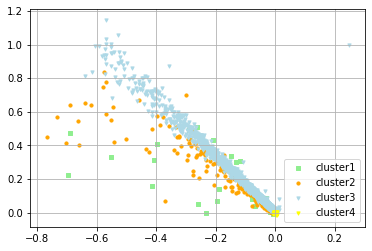

In [55]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [56]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소, 돈

99

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

1287

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 사회이슈

8800

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # Influencer 논쟁

29

In [60]:
# X[:,1]
from sklearn.cluster import AgglomerativeClustering
import numpy as np

agg = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="cosine")

assign = agg.fit_predict(X)
# assign = agg.fit(X)

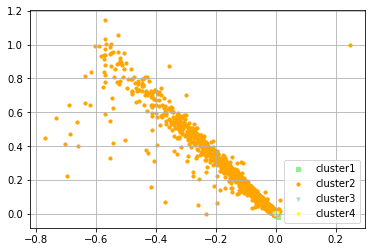

In [61]:
plt.scatter(X[assign==0,0],X[assign==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign==1,0],X[assign==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign==2,0],X[assign==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign==3,0],X[assign==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

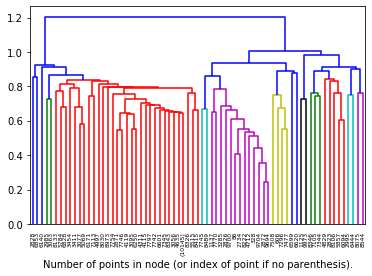

In [63]:
model1 = AgglomerativeClustering(linkage ="average", affinity="cosine", distance_threshold=0, n_clusters=None)

model1.fit(X)

plot_dendrogram(model1, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [64]:
temp_cluster_result0 = pd.DataFrame(columns=temp_heder)
temp_cluster_result0['word'] = list(model.wv.vocab)
temp_cluster_result0['cluster'] = assign
temp_cluster_result0['raw_data'] = X.tolist()

In [65]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, assign)

temp_cluster_result0['centroid'] = temp_cluster_result0['cluster'].apply(lambda x : clf.centroids_[x])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
cosine_centroid_list0 = []
for cosine_centroid in temp_cluster_result0['centroid'] :
    cosine_centroid_list0.append(cosine_centroid.tolist())

In [67]:
temp_distance0 = pairwise_distances(X,cosine_centroid_list0, metric='cosine')
temp_cluster_result0['distance'] = temp_cluster_result0.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)
temp_cluster_result0['tfidf'] = tf_idf_value
temp_cluster_result0['score'] = temp_cluster_result0.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [68]:
temp_cluster_result0[temp_cluster_result0['cluster']==0].sort_values(by=['score']).head(20)  # 불안,변화

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9694,"[0.0073035410605371, -0.01691882684826851, 0.0...",앤제이,0,"[-0.0006199834169819951, -0.005130612757056951...",0.202922,0.000210,1.202712,NaN
86,"[0.0017490526661276817, -0.01431550458073616, ...",힐스,0,"[-0.0006199834169819951, -0.005130612757056951...",0.210398,0.000631,1.209766,NaN
328,"[-0.006091106217354536, -0.008240185678005219,...",키웠,0,"[-0.0006199834169819951, -0.005130612757056951...",0.240350,0.000421,1.239929,NaN
2872,"[-0.002344190375879407, -0.00579880503937602, ...",추월,0,"[-0.0006199834169819951, -0.005130612757056951...",0.254020,0.000210,1.253810,NaN
4712,"[-0.0016437750309705734, -0.003733493853360414...",BitKing,0,"[-0.0006199834169819951, -0.005130612757056951...",0.281014,0.000421,1.280593,NaN
9704,"[-0.0012586299562826753, -0.004834669642150402...",난립,0,"[-0.0006199834169819951, -0.005130612757056951...",0.338923,0.000210,1.338713,NaN
8222,"[0.0006233389722183347, -0.0074662030674517155...",On,0,"[-0.0006199834169819951, -0.005130612757056951...",0.384753,0.000421,1.384332,NaN
2734,"[0.005774227902293205, -0.008082152344286442, ...",갈라졌,0,"[-0.0006199834169819951, -0.005130612757056951...",0.412831,0.000210,1.412621,NaN
7770,"[-0.0020862706005573273, -0.003682456910610199...",Hsaka,0,"[-0.0006199834169819951, -0.005130612757056951...",0.480228,0.000421,1.479807,NaN
2826,"[0.0035223616287112236, -0.0022105788812041283...",NYDFS,0,"[-0.0006199834169819951, -0.005130612757056951...",0.488097,0.000421,1.487676,NaN


In [69]:
temp_cluster_result0[temp_cluster_result0['cluster']==1].sort_values(by=['score']).head(20)  # 거래소, 투자, 비즈니스

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.7314131259918213, 0.567471981048584, -0.49...",화폐,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.053687,0.398756,0.654931,NaN
244,"[-0.5690996646881104, 1.1438292264938354, -0.4...",블록체인,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.023277,0.333734,0.689543,NaN
4,"[-0.7680253386497498, 0.45081955194473267, -0....",암호,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.077952,0.354356,0.723596,NaN
5,"[-0.6906716823577881, 0.6404334902763367, -0.4...",비트코인,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.021122,0.254194,0.766928,NaN
18,"[-0.6201390027999878, 0.6416108012199402, -0.4...",거래소,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.016795,0.148139,0.868656,NaN
82,"[-0.6374952793121338, 0.6529945135116577, -0.3...",거래,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.012447,0.139722,0.872725,NaN
270,"[-0.5276700854301453, 1.055306315422058, -0.39...",기술,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.017746,0.144773,0.872974,NaN
181,"[-0.5526813268661499, 0.947127103805542, -0.40...",기업,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.009197,0.122047,0.887150,NaN
180,"[-0.5688800811767578, 0.8820508122444153, -0.4...",서비스,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.013854,0.122257,0.891597,NaN
1011,"[-0.5905125737190247, 0.9930996894836426, -0.4...",통해,1,"[-0.037507314234972, 0.061994098126888275, -0....",0.002284,0.108579,0.893704,NaN


In [70]:
temp_cluster_result0[temp_cluster_result0['cluster']==2].sort_values(by=['score']).head(20)  # 발전

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5857,"[-0.00035899036447517574, 0.004300797823816538...",역동,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.330457,0.000210,1.330246,NaN
7105,"[0.0037127311807125807, 0.002447431441396475, ...",일회,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.445455,0.000210,1.445245,NaN
6094,"[0.0036057601682841778, -0.0006906570051796734...",JD,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.500980,0.000421,1.500559,NaN
8346,"[0.001503220060840249, 0.0035470533184707165, ...",비로소,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.514173,0.000210,1.513963,NaN
4829,"[-0.00027200288604944944, 0.005506859160959721...",DOVU,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.538747,0.000421,1.538326,NaN
8075,"[0.003611732739955187, -0.000783291005063802, ...",이을,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.539397,0.000210,1.539187,NaN
2823,"[0.001059572328813374, 0.003947187215089798, 0...",핀센,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.594327,0.000210,1.594117,NaN
6444,"[0.003674108302220702, 0.002241910435259342, -...",전해야,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.598847,0.000210,1.598637,NaN
8106,"[-0.0044702491723001, -0.0013419120805338025, ...",퇴출,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.623695,0.000210,1.623485,NaN
2995,"[0.004962617065757513, 0.0012821449199691415, ...",미적,2,"[0.0010069719282910228, 0.0016595623455941677,...",0.631257,0.000210,1.631047,NaN


In [71]:
temp_cluster_result0[temp_cluster_result0['cluster']==3].sort_values(by=['score']).head(20)  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9973,"[0.003946514800190926, 0.002894513076171279, 0...",넘나들,3,"[0.0012374885845929384, 0.0007841065526008606,...",0.194213,0.00021,1.194003,NaN
1125,"[-0.0014715376310050488, -0.001326299970969557...",박상기,3,"[0.0012374885845929384, 0.0007841065526008606,...",0.211001,0.00021,1.210791,NaN


In [72]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==0]) #  이슈

21

In [73]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==1]) # 거래소 투자 비즈

10180

In [74]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==2]) # 사회발전 

12

In [75]:
len(temp_cluster_result0[temp_cluster_result0['cluster']==3]) # 제도 

2

In [76]:
from sklearn import metrics
silhouette_score1 = metrics.silhouette_score(X, assign, metric='cosine')

In [77]:
silhouette_score1

0.9097119

In [78]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [79]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [80]:
kmeans.inertia_

880.864501953125

In [81]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 0 2 ... 0 0 0]


In [82]:
cluster_values= list(model.wv.vocab)

In [83]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-880.864501953125


In [84]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [85]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7575236


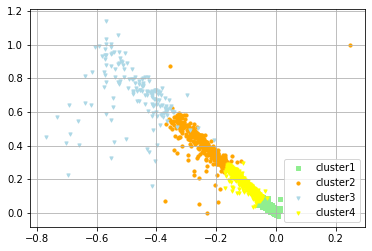

In [86]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [87]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [88]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [89]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [90]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [91]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [92]:
import scipy.spatial.distance as dist

In [93]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [94]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [95]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 사회시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5145,"[-0.015733124688267708, 0.024597810581326485, ...",아이크,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.025860,0.000210,1.025649,NaN
4938,"[-0.011426443234086037, 0.027837244793772697, ...",유기,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026162,0.000421,1.025741,NaN
8076,"[-0.016494998708367348, 0.0266681257635355, -0...",정해져,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026363,0.000421,1.025942,NaN
4418,"[-0.017679234966635704, 0.02091113291680813, -...",Light,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026510,0.000421,1.026089,NaN
6345,"[-0.013978437520563602, 0.02078784815967083, -...",페로즈,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026817,0.000631,1.026186,NaN
4828,"[-0.01667669601738453, 0.023660508915781975, -...",날씨,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026636,0.000421,1.026215,NaN
7078,"[-0.010682905092835426, 0.022789932787418365, ...",적법,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026949,0.000631,1.026318,NaN
4466,"[-0.01288530882447958, 0.021130090579390526, -...",폴란드,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026791,0.000421,1.026370,NaN
5546,"[-0.011484779417514801, 0.024357754737138748, ...",됐으나,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.027003,0.000631,1.026371,NaN
1641,"[-0.018100975081324577, 0.026521509513258934, ...",지위,0,"[-0.014040697, 0.02402635, -0.010760801, -0.02...",0.026948,0.000421,1.026527,NaN


In [96]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1674,"[-0.22953301668167114, 0.3982265293598175, -0....",자리,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.055248,0.010942,1.044306,NaN
418,"[-0.24747970700263977, 0.3933159410953522, -0....",영국,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.057232,0.009259,1.047973,NaN
429,"[-0.24722996354103088, 0.39536845684051514, -0...",통신,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.059870,0.011153,1.048718,NaN
205,"[-0.23841233551502228, 0.393019437789917, -0.1...",당시,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.061671,0.011363,1.050308,NaN
557,"[-0.24375298619270325, 0.40379706025123596, -0...",상태,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.072413,0.011363,1.061050,NaN
1416,"[-0.2428315281867981, 0.40596356987953186, -0....",조사,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.080017,0.013467,1.066550,NaN
167,"[-0.22925202548503876, 0.3976816236972809, -0....",의견,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.082302,0.009469,1.072833,NaN
522,"[-0.23118101060390472, 0.4078308939933777, -0....",시키,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.088235,0.010942,1.077293,NaN
1179,"[-0.2525402903556824, 0.4005640149116516, -0.1...",등록,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.093401,0.012626,1.080776,NaN
1020,"[-0.2328537404537201, 0.4186593294143677, -0.1...",신청,1,"[-0.23771447, 0.39341, -0.18318948, -0.4058703...",0.093066,0.010311,1.082755,NaN


In [97]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 긍정전망

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
110,"[-0.46323737502098083, 0.7234331965446472, -0....",일본,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.147114,0.028828,1.118286,NaN
62,"[-0.4543996751308441, 0.7334909439086914, -0.3...",발표,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.159419,0.038087,1.121332,NaN
1136,"[-0.4779014587402344, 0.7264956831932068, -0.3...",중국,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.169082,0.032616,1.136466,NaN
263,"[-0.4793798327445984, 0.7186506986618042, -0.3...",지난해,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.188553,0.034089,1.154465,NaN
461,"[-0.4655231833457947, 0.6631066203117371, -0.3...",이상,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.277092,0.031774,1.245317,NaN
49,"[-0.4958585500717163, 0.7431549429893494, -0.3...",최근,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.292715,0.035772,1.256942,NaN
295,"[-0.4704294502735138, 0.7720645666122437, -0.3...",때문,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.316553,0.036614,1.279939,NaN
63,"[-0.47956496477127075, 0.7095386385917664, -0....",글로벌,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.325645,0.043558,1.282087,NaN
215,"[-0.45853421092033386, 0.7823317646980286, -0....",설명,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.320723,0.033247,1.287476,NaN
37,"[-0.45784541964530945, 0.7648178339004517, -0....",자금,2,"[-0.47089663, 0.70690626, -0.36530384, -0.7637...",0.334530,0.042927,1.291603,NaN


In [98]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(40,'score') # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2045,"[-0.09006799757480621, 0.15086394548416138, -0...",신고,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.032898,0.003788,1.029111,NaN
1457,"[-0.0839410051703453, 0.14624737203121185, -0....",내역,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.035862,0.003998,1.031864,NaN
894,"[-0.08295776695013046, 0.15243051946163177, -0...",부장,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.033977,0.002104,1.031873,NaN
4559,"[-0.08767841756343842, 0.15327806770801544, -0...",게이트,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.036696,0.003156,1.033540,NaN
2745,"[-0.08596549928188324, 0.14987359941005707, -0...",자기,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.037187,0.002736,1.034452,NaN
4310,"[-0.09210590273141861, 0.14728228747844696, -0...",채널,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.039433,0.003577,1.035855,NaN
3218,"[-0.0898279920220375, 0.15416713058948517, -0....",어떻게,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.039771,0.003367,1.036404,NaN
3076,"[-0.09345360845327377, 0.13883695006370544, -0...",비율,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.041396,0.004840,1.036556,NaN
741,"[-0.08756116777658463, 0.14546388387680054, -0...",노출,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.041549,0.004419,1.037130,NaN
3107,"[-0.0890350490808487, 0.15928077697753906, -0....",허가,3,"[-0.08881825, 0.14982264, -0.067584574, -0.151...",0.041722,0.004209,1.037513,NaN


In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #사회적 시도

8548

In [100]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #제도 한계 

379

In [101]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #긍정전망

150

In [102]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #사회 협업

1138

In [103]:
agg1 = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity="euclidean")

assign1 = agg1.fit_predict(X)

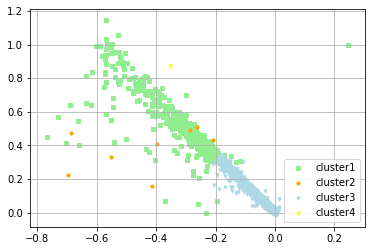

In [104]:
plt.scatter(X[assign1==0,0],X[assign1==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[assign1==1,0],X[assign1==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[assign1==2,0],X[assign1==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[assign1==3,0],X[assign1==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [105]:
temp_cluster_result2 = pd.DataFrame(columns=temp_heder)
temp_cluster_result2['word'] = list(model.wv.vocab)
temp_cluster_result2['cluster'] = assign1
temp_cluster_result2['raw_data'] = X.tolist()
clf1 = NearestCentroid()
clf1.fit(X, assign1)

NearestCentroid()

In [106]:
temp_cluster_result2['centroid'] = temp_cluster_result2['cluster'].apply(lambda x : clf1.centroids_[x])
euclidean_centroid_list2 = []
for euclidean_centroid in temp_cluster_result2['centroid'] :
    euclidean_centroid_list2.append(euclidean_centroid.tolist())
temp_distance2 = pairwise_distances(X,euclidean_centroid_list2, metric='euclidean')
temp_cluster_result2['distance'] = temp_cluster_result2.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [107]:
temp_cluster_result2['tfidf'] = tf_idf_value
temp_cluster_result2['score'] = temp_cluster_result2.apply(lambda x : x.distance + (1- x.tfidf),axis=1)

In [108]:
temp_cluster_result2[temp_cluster_result2['cluster']==0].sort_values(by=['score']).head(20) #  투자, 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
115,"[-0.33252719044685364, 0.5411574840545654, -0....",상황,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.102449,0.017676,1.084774,NaN
1124,"[-0.3180634379386902, 0.5398627519607544, -0.2...",결정,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.114642,0.015571,1.099071,NaN
2848,"[-0.3201558589935303, 0.5022913217544556, -0.2...",오비,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.126875,0.020411,1.106464,NaN
116,"[-0.32439762353897095, 0.554530680179596, -0.2...",이라고,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.128207,0.019990,1.108217,NaN
93,"[-0.3212377727031708, 0.4944612681865692, -0.2...",한편,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.129139,0.018307,1.110832,NaN
762,"[-0.32060810923576355, 0.5404446721076965, -0....",주장,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.129524,0.018517,1.111007,NaN
31,"[-0.34013181924819946, 0.5255181789398193, -0....",채굴,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.131770,0.019780,1.111990,NaN
253,"[-0.3206736743450165, 0.5162782073020935, -0.2...",하지만,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.127746,0.015571,1.112174,NaN
888,"[-0.34386321902275085, 0.5417496562004089, -0....",가장,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.139309,0.023147,1.116163,NaN
1073,"[-0.347577840089798, 0.49658656120300293, -0.2...",증권,0,"[-0.327146977186203, 0.5216086506843567, -0.24...",0.155888,0.024620,1.131268,NaN


In [109]:
temp_cluster_result2[temp_cluster_result2['cluster']==1].sort_values(by=['score']).head(20) #  언론 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
20,"[-0.551529049873352, 0.32809633016586304, -0.6...",따르,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.014617,0.078489,1.936128,NaN
126,"[-0.2876547574996948, 0.49277636408805847, -0....",자료,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.318367,0.041664,2.276703,NaN
123,"[-0.2623101770877838, 0.5072570443153381, -0.4...",기사,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.339175,0.032405,2.306770,NaN
383,"[-0.6958741545677185, 0.22416965663433075, -0....",시간,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.470158,0.077016,2.393142,NaN
124,"[-0.20783038437366486, 0.4322354793548584, -0....",제보,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.495616,0.027355,2.468261,NaN
603,"[-0.41493022441864014, 0.15867212414741516, -0...",현지,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.548786,0.049029,2.499757,NaN
85,"[-0.6877937316894531, 0.4706915318965912, -0.7...",코인,1,"[-0.43806082010269165, 0.37749210000038147, -0...",1.907332,0.164973,2.742359,NaN
125,"[-0.3965640366077423, 0.4060383439064026, -0.8...",보도,1,"[-0.43806082010269165, 0.37749210000038147, -0...",2.102922,0.067126,3.035797,NaN


In [110]:
temp_cluster_result2[temp_cluster_result2['cluster']==2].sort_values(by=['score']).head(20) #  비즈니스 이슈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5644,"[-0.02214011363685131, 0.044702667742967606, -...",루이비통,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.026646,0.000842,1.025804,NaN
4564,"[-0.025202615186572075, 0.034200072288513184, ...",백만,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.027435,0.000842,1.026593,NaN
2211,"[-0.025728650391101837, 0.04409234598278999, -...",팔자,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.027251,0.000421,1.026830,NaN
5625,"[-0.023356718942523003, 0.03835029900074005, -...",조지,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.027850,0.000842,1.027009,NaN
4549,"[-0.023328784853219986, 0.044192902743816376, ...",오피스,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.027768,0.000631,1.027137,NaN
8248,"[-0.029404548928141594, 0.043581146746873856, ...",Fnality,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.027831,0.000421,1.027410,NaN
2504,"[-0.023710785433650017, 0.0458720326423645, -0...",ㆍ강성훈,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.028089,0.000421,1.027668,NaN
7415,"[-0.023439601063728333, 0.042909175157547, -0....",무작위,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.028611,0.000842,1.027769,NaN
5552,"[-0.024372292682528496, 0.0384574756026268, -0...",Index,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.028209,0.000421,1.027788,NaN
9590,"[-0.023866083472967148, 0.037365786731243134, ...",은행원,2,"[-0.024210793897509575, 0.04110746458172798, -...",0.028435,0.000631,1.027803,NaN


In [111]:
temp_cluster_result2[temp_cluster_result2['cluster']==3].sort_values(by=['score']).head(20) #  암호화폐 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2863,"[-0.3550659120082855, 0.8750371932983398, -0.1...",Coinness,3,"[-0.3550659120082855, 0.8750371932983398, -0.1...",0.0,0.000421,0.999579,NaN


In [112]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==0]) # 투자, 제도

432

In [113]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==1]) # 언론

8

In [114]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==2]) # 비즈니스 이슈

9774

In [115]:
len(temp_cluster_result2[temp_cluster_result2['cluster']==3]) # 암호화폐 

1

In [116]:
silhouette_score2 = metrics.silhouette_score(X, assign1, metric='euclidean')

In [117]:
silhouette_score2

0.87455624